# [Matplotlib](https://www.matplotlib.org) tricks

Since matplotlib is the de facto standard for plotting with Python in science I am also using it for a while. From time to time there are questions I have got and I took some small notes how to solve different problems.

Though matplotlib 2.0 is much nicer by default than matplotlib 1, some of the following hints still might me usefull.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
data = range(10)

## Avoid offset labeling

One doesn't always want an offset for the axis labeling like $4.9949e2 + 0.022$, but wants the numbers $499.512$ in the example below.

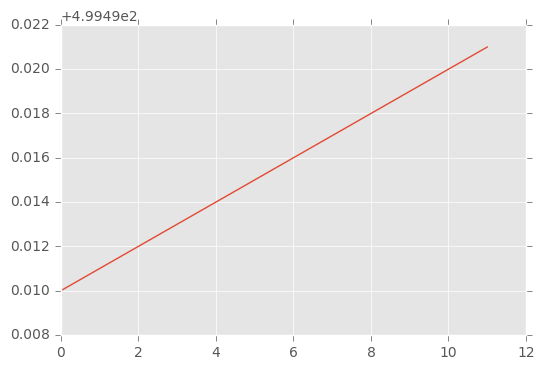

In [2]:
plt.plot([499.5 + i/1000. for i in range(12)])

To achive this one has to write a cryptic line
``` Python
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
```
if one uses `plt.plot` directly, but gets a nice plot.

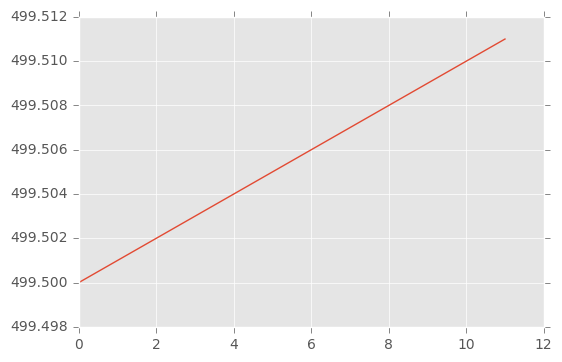

In [3]:
plt.plot([499.5 + i/1000. for i in range(12)])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)

If one uses `ax` one does not have to shoot from behind through the chest into the eye and the cryplic line gets much less cryptic:
``` Python
ax1.ticklabel_format(useOffset=False)
```

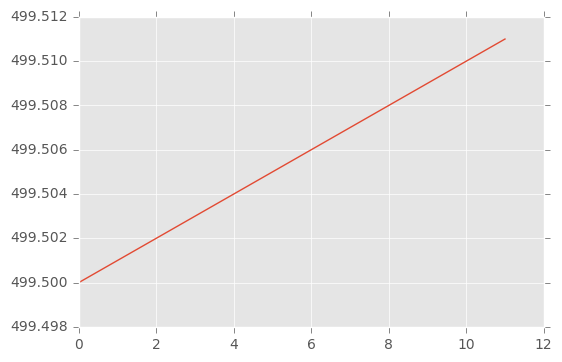

In [4]:
fig, ax1 = plt.subplots(1, 1)
ax1.plot([499.5 + i/1000. for i in range(12)])
ax1.ticklabel_format(useOffset=False)

# Prevent cutting the ticks

multiplot one x-axis (e. g. plot_fixedK.py):
``` Python
    plt.setp(ax1.get_xticklabels(), visible=False)
    ax2 = plt.subplot(212, sharex=ax1)
```

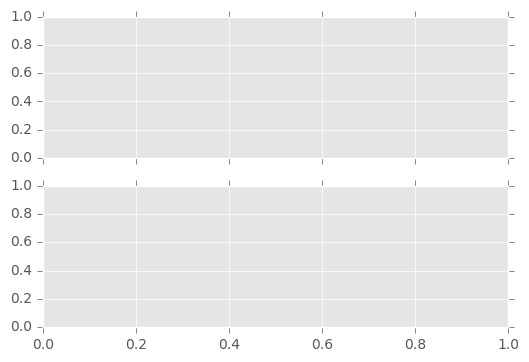

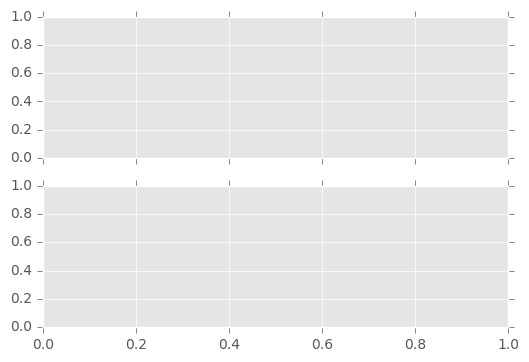

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1)
plt.setp(ax1.get_xticklabels(), visible=False)
ax2 = plt.subplot(212, sharex=ax1)
plt.show()

# short hand/ more elegant
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
plt.show()

No xaxis labeling and no ticks (e. g. time a. u.):
```
    plt.tick_params(axis="x", which="both", bottom="off", top="off", labelbottom="off")
```

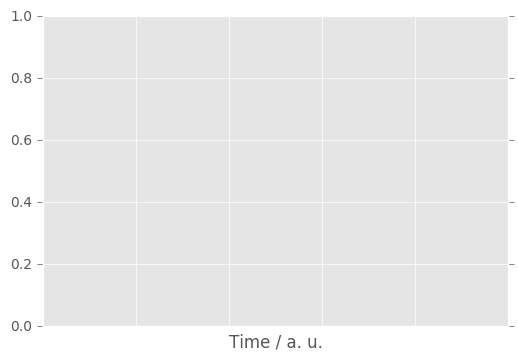

In [6]:
plt.tick_params(axis="x", which="both", bottom="off", top="off", labelbottom="off")
plt.xlabel("Time / a. u.")
plt.show()

# make plots stick together:
``` Python
    plt.subplots_adjust(hspace=0.0)
```
with not overlapping y-Axis/cut the upper (and lower) ticks and limit them to a certain number (6):
``` Python
    from matplotlib.ticker import MaxNLocator
    ax1.yaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
```
offset the y-labeling so it doesn't glue into the ticks:
``` Python
    ax1.set_ylabel("Horizontal tune", labelpad=20)
```

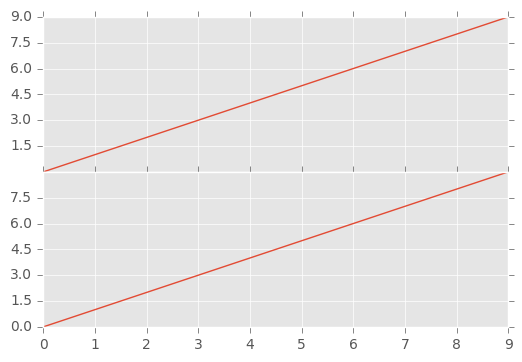

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax2.plot(range(10))
ax1.plot(range(10))

# delete the space between the plots
plt.subplots_adjust(hspace=0.0)

# delete the otherwise overlapping tick lables (locators)
from matplotlib.ticker import MaxNLocator
ax2.yaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
ax1.yaxis.set_major_locator(MaxNLocator(nbins=6, prune='lower'))

As one can see the ticks are of the first plot are still visible which should be changed.
``` Python
ax1.tick_params(axis="x", which="both", bottom="off", top="off", labelbottom="off")
```
does the trick by setting the ticks *off*. In this example for the x-axis as well the major as the minor ticks (`both`) and at the bottom and the top off and the labeling at the bottom also off.

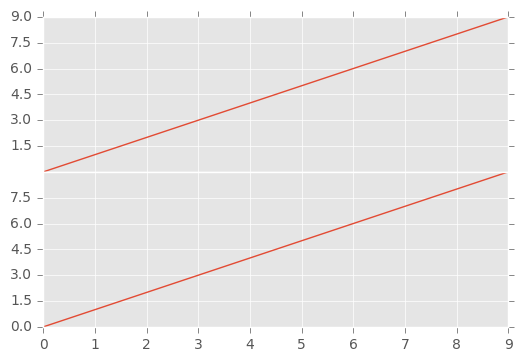

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax2.plot(range(10))
ax1.plot(range(10))

# delete the space between the plots
plt.subplots_adjust(hspace=0.0)

# delete the otherwise overlapping tick lables (locators)
from matplotlib.ticker import MaxNLocator
ax2.yaxis.set_major_locator(MaxNLocator(nbins=6, prune='upper'))
ax1.yaxis.set_major_locator(MaxNLocator(nbins=6, prune='lower'))

# Delete the overlapping ticks
ax2.tick_params(axis="x", which="both", bottom="on", top="off")
ax1.tick_params(axis="x", which="both", bottom="off", top="on", labelbottom="off")

## y-labels positions
Another thing that often annoyes when one plots multiple plots is that the y-labels are at different positions, because the numbers are not all of the same size. One solution is to make the numbers all of the same size, but that does not always work.
In the latter case you can use
``` Python
ax1.set_ylabel("Horizontal tune", labelpad=20)
```
to have a padding of `20` around the ylabels or `10` or whatever.

In the next plot the tick `10` of the vertical tune causes the label to be at the position at which it is now, but the horizontal tune would be closer to the ticks and therefore not aligned correct with respect to the vertical tune label.

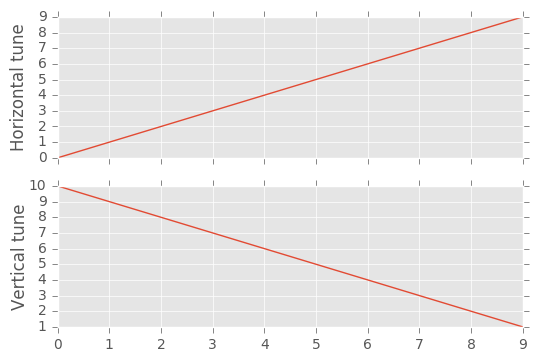

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(range(10))
ax2.plot(range(10, 0, -1))

ax1.set_ylabel("Horizontal tune", labelpad=7)
ax2.set_ylabel("Vertical tune", labelpad=0)

# Transparent background and savefig configurations

Transparent background in the output image is useful if one uses LaTeX (and negative vspace) or can position the graphics freely on a presentation's slides.
To get a transparent background one has to add the option in the `savefig` command:
``` Python
plt.savefig("output_picture.pdf", transparent=True)
```

To avoid clipping of labels and legends when saving an image, I often use the tight bounding boxes `bbox_inches='tight'` option:
``` Python
plt.savefig("figure.pdf", bbox_inches="tight")
```

But be aware that this also might cause big white spaces when you are hiding data points using `plt.ylim` in a range that does not cover all points.

If this happens in a Jupyter notebook, because they use `bbox_inches='tight'` as their default, and you do not want it to happen, you need some Jupyter magic
```
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
```
via [stackoverflow](https://stackoverflow.com/questions/37864735/matplotlib-and-ipython-notebook-displaying-exactly-the-figure-that-will-be-save/37879281#37879281)

**TODO**: markers can be shaped individually e.\,g. by a triplett of ints

# Legend

## Semi transparent legend

If one wants to have a semi transparent legend it's the easiest to directly say it when plotting the legend with the `framealpha` keyword
``` Python
    plt.legend(framealpha=0.7)
```
but sometimes it is necessary to set it later, e. g. if one wants to split content from formatting, and then one can use
``` Python
    plt.legend().get_frame().set_alpha(0.7)
```

So in the example I set the alpha value to 0.0 first (make it completely transparent) and later on to 0.5.
Another case to think of is the one when you have one plot with title and semi-transparent legend saved as a PNG and one saved as EPS which does not support semi-transparency where you make the legend completely transparent.

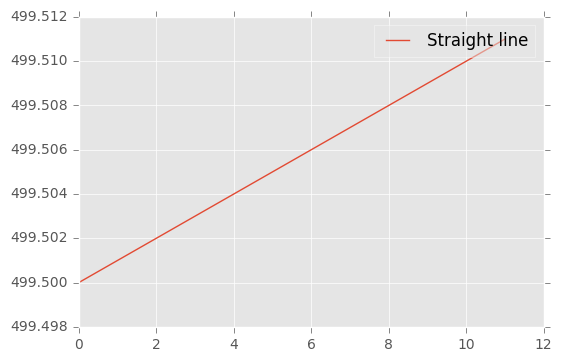

In [10]:
fig, ax1 = plt.subplots(1, 1)
ax1.plot([499.5 + i/1000. for i in range(12)])
ax1.ticklabel_format(useOffset=False)

leg = plt.legend(["Straight line"], framealpha=0.0)
leg.get_frame().set_alpha(.5)

## Legend outside the main plot
``` Python
plt.legend([…], loc="upper center", bbox_to_anchor=(0.5, 1.25), ncol=2
```
with multiple (2) columns and transparency. The bounding box of the plot (the main plot/grey area) goes from 0 to 1 in both directions starting at the bottom left, so `1.25` is 0.25 above 1 in the y plane.
It is also possible to use four coordinates for the bbox_to_anchor (e.g. `bbox_to_anchor=(-1.2, -.245, 3.4, .102)`)

Other cool keywords are `mode='expand'` in combination with `borderaxespad=0` as seen in the lower legend of the second plot which expands over the complete canvas area.

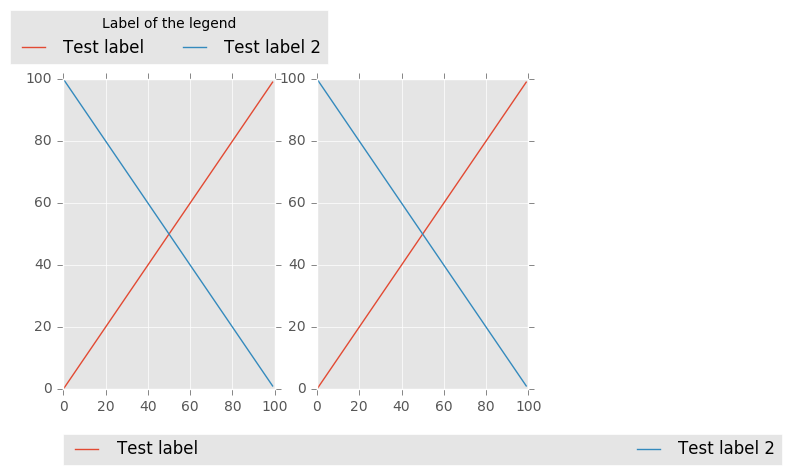

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.plot(range(100), label="Test label")
ax1.plot(range(100, 0, -1), label="Test label 2")
ax2.plot(range(100), label="Test label")
ax2.plot(range(100, 0, -1), label="Test label 2")

ax1.legend(loc="upper center", 
           bbox_to_anchor=(0.5, 1.25), # above the plot
           ncol=2, 
           title="Label of the legend")

ax2.legend(loc=3, # alternative notation
           bbox_to_anchor=(-1.2, -.245, 3.4, .102),  # below the plot
           ncol=2, 
           mode="expand",  # makes the plot go from the left end to the right end of all subplots
           borderaxespad=0.,  # deletes spaces around the legend
          )

**TODO**
dynamic legend with selections (2014-10-27_catactInit/cleanedup.py):
    selection = range(3, 7)
    for i, wig in enumerate(list(itemgetter(*selection)(wiggler))):
        plt.plot(…)
    plt.legend(["measurement"] + list(itemgetter(*selection)(legend)))

## Be aware and fix strange sorting of labels with errorbars

I expected the errorbar legend to be first if I plot errorbars first, but that is not the case!
Since `plot`s and `errorbar`s and `hist`s return different things the labeling is not handled like I expected it.
There are different [open issues](https://github.com/matplotlib/matplotlib/issues/8389) and [closed ones](https://github.com/matplotlib/matplotlib/issues/8283) somehow related to this behaviour [different stackoverflow answers](https://stackoverflow.com/questions/22263807/how-is-order-of-items-in-matplotlib-legend-determined) that came to a similar solution to this one I present here.

For the moment I provide a workaround.

### The issue I had
In the following example the legend for the errorbar that I add in the first list is ranked after the plots (2 and 3), which mixes up the labels!
``` Python
plt.errorbar([0,1,2], [1,2,3], [0.1, 0.1, 0.1])
plt.plot([2,3,4])
plt.plot([3,4,5])
plt.legend(["errorbar 1"] + ["plot 2", "plot 3"])
```

[One stackoverflow solution](https://stackoverflow.com/a/36866605) tries to fix this by hand. So know that errorbars are labeled after the plots and thus you need to say
```
plt.legend(["plot 2", "plot 3"] + ["errorbar 1"])
```

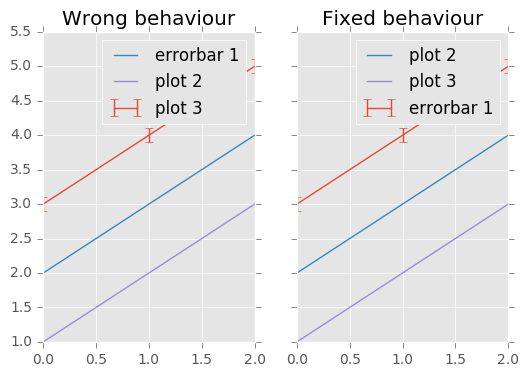

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

labels = []
ax1.set_title("Wrong behaviour")
ax1.errorbar([0,1,2], [3,4,5], [0.1, 0.1, 0.1])
ax1.plot([2,3,4])
ax1.plot([1,2,3])
ax1.legend(["errorbar 1"] + ["plot 2", "plot 3"])

ax2.set_title("Fixed behaviour")
ax2.errorbar([0,1,2], [3,4,5], [0.1, 0.1, 0.1])
ax2.plot([2,3,4])
ax2.plot([1,2,3])
ax2.legend(["plot 2", "plot 3"] + ["errorbar 1"])

To fix the ordering of the labels and not just the matching of labels to lines and to automate it a bit some more tricks are necessary.

We need to provide every plot (also the errorbar plots) with the number of its appearance as its label.
```
plt.errorbar([0,1,2], [1,2,3], [0.1,0.1,0.1], label=1)  # e1
plt.plot([2,3,4], label=2)  # p2
plt.plot([3,4,5], label=3)  # p3
```

Now we get the legend handles and labels for all plots `ax.get_legend_handles_labels()`. 
Since we have got the ordering in the labels we can use them to sort the handles by the labels.

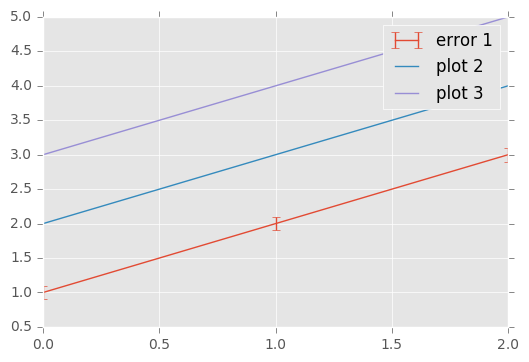

In [13]:
# Plot with index as label
plt.errorbar([0,1,2], [1,2,3], [0.1,0.1,0.1], label=1)  # e1
plt.plot([2,3,4], label=2)  # p2
plt.plot([3,4,5], label=3)  # p3

# Sort legend handlers by label/index
from operator import itemgetter
ax = plt.gca()
handler, labels = ax.get_legend_handles_labels()
# sort handlers by label
sorted_handler = list(zip(*sorted(zip(handler, labels),  key=itemgetter(1))))  # type: List[Tuple[handler, label]]

# plot the legend with individual labels
plt.legend(
    sorted_handler[0], 
    # our labels can be provided at any position and thus replaced by e. g. other languages
    ["error 1", "plot 2", "plot 3"]
)

## Hack for legends with subtitles 
This is taken from [Stackexchange/MaxNoe](http://stackoverflow.com/questions/24787041/multiple-titles-in-legend-in-matplotlib)

There are some caviats with this solution.
* First of all one has to collect the legend objects from the plots (mind the comma after `plot1`.
* Then one has to know the background color of the legend since there is a rectangle in this color so one does not sees it.
  That also means, that this solution is not usable if one wants to have a semi-transparent legend!
* And since the subtitles are basically also just labels one needs to format them by hand e.g. using $\LaTeX$ (`r"$\bftext{Subtitle}$`) which I will not in the following example, since I do not have matplotlib and $\LaTeX$ configured on this machine properly.
* And last but not least the subtiles are not centered of course.

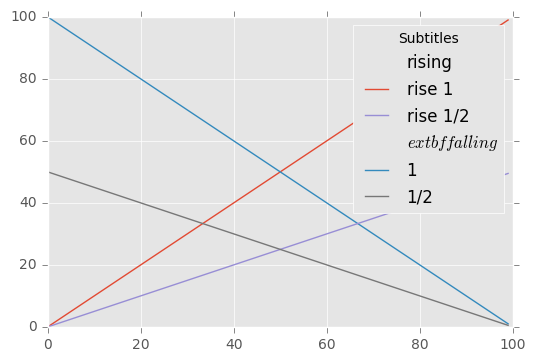

In [14]:
plot1, = plt.plot(range(100), label="rise 1")
plot2, = plt.plot(range(100, 0, -1), label="fall 1")
plot3, = plt.plot([i/2. for i in range(100)], label="rise 1/2")
plot4, = plt.plot([i/2. for i in range(100, 0, -1)], label="fall 1/2")

from matplotlib.patches import Rectangle
title_proxy = Rectangle((0, 0), 0, 0, color='#e5e5e5')
plt.legend([title_proxy, plot1, plot3, title_proxy, plot2, plot4], 
           ["rising", "rise 1", "rise 1/2", "$\textbf{falling}$", "1", "1/2"],
           title="Subtitles")

## Relabeling (e. g. for internationalization)
If one wants to change the labeling of a plot afterwards (e. g. if you want to change the language at one place) you can use the following mechanism

``` Python
line = plt.plot(x, y, label="Tolles label")
if en: 
    plt.setp(line, label="Fancy label")
```
If one uses figures than it is possible via `set_label()`, I think.

## Draggable
There is a function ``plt.legend().draggable()`` that allows one to drag the legend box in an interactive plot. This only works before zooming, because then you move the plot by clicking on the plot/legend.

# Extra Label

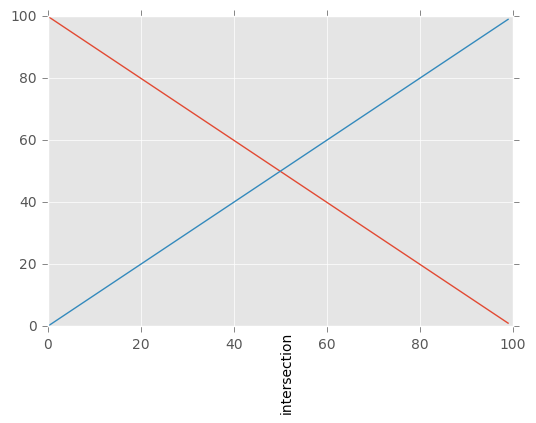

In [15]:
plt.plot(range(100, 0, -1))
plt.plot(range(100))

x_pos = 50
y_pos = -5  # find out by playing around
text = "intersection"
plt.text(x_pos, y_pos, text, rotation=90)

Vertical lines that go automatically through the complete plot.
You need to get the y-limits. As always, if you use `plt.plot` you use
```
plt.gca()
```
to get the axis object type as with `fig, ax = plt.subplots()`

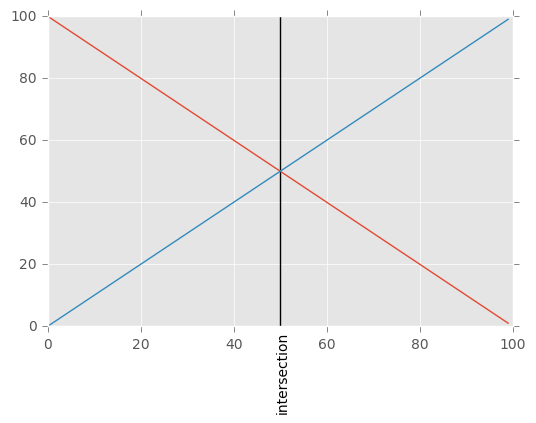

In [16]:
plt.plot(range(100, 0, -1))
plt.plot(range(100))

x_pos = 50
y_pos = -5
text = "intersection"
plt.text(x_pos - 1, y_pos, text, rotation=90)

plt.vlines([x_pos], *plt.gca().get_ylim(), linewidth=1)

# Title between subplots

If one wants to use `title` in combination with `subplots` one finds out, that the title is either set via 
``` Python
ax.set_title("Title of subplot")
``` 
for each subplot, but then it is centered above the subplot. Or one finds out that figures do not have a `set_title` or a `title`, but a 
``` Python 
fig.suptitle("Shared title for all subplots")
```

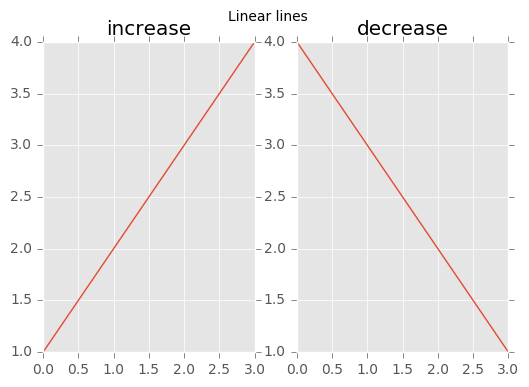

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.plot([1, 2, 3, 4])
ax1.set_title("increase")
ax2.plot([4, 3, 2, 1])
ax2.set_title("decrease")
fig.suptitle("Linear lines")
plt.show()

# TODO
## Text, Anmerkungen, Pfeile
Mit [ax.annotate](http://matplotlib.org/users/annotations_guide.html#plotting-guide-annotation) kann man Pfeile und Text/Anmerkungen machen, so wie ich es in ![Annotations in a plot with matplotlib](images/plot_vacuum.png) gemacht habe.
Die entscheidenden Zeilen Python-Code lauten
``` Python

```
Mit `plt.text` kann man Text in Plots bringen, wenn man nicht `annotate` nutzten will.

## Gebrochene Axen
Noch nicht ausgetestet, aber es geht wohl mit ein bisschen Aufwand. siehe das [Beispiel für gebrochene Axen](http://matplotlib.org/examples/pylab_examples/broken_axis.html)